In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report


In [2]:
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
print("\n--- Train Dataset Info ---")
print(train_df.info())
print("\n--- Train Summary Statistics ---")
print(train_df.describe())



--- Train Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- Train Summary Statistics ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.3

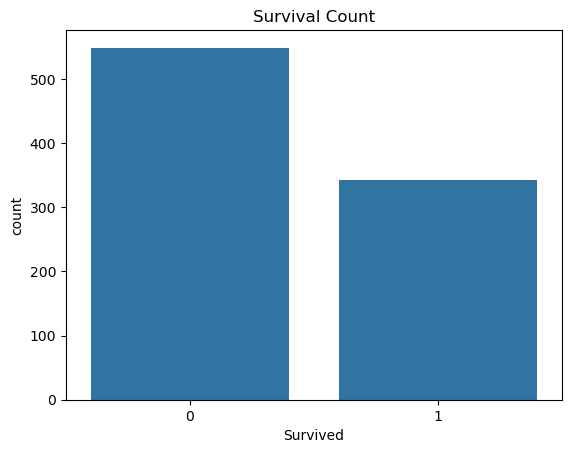

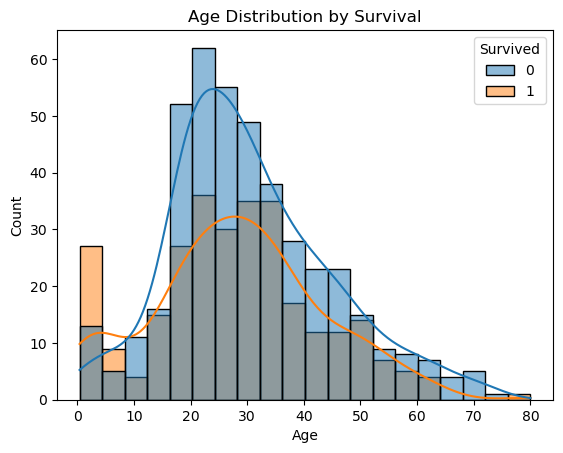

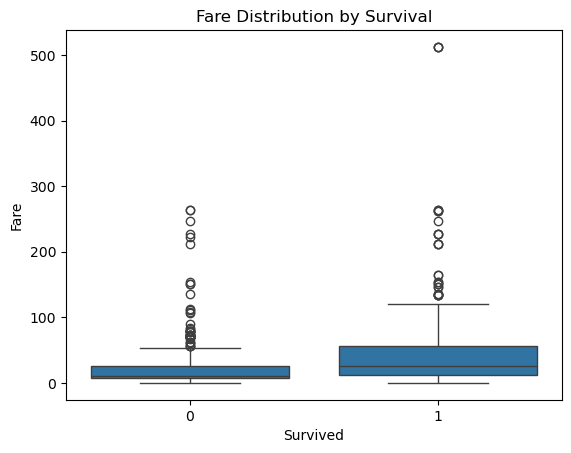

In [6]:
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

sns.histplot(data=train_df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

sns.boxplot(x='Survived', y='Fare', data=train_df)
plt.title('Fare Distribution by Survival')
plt.show()

In [14]:
def preprocess(df):
    df = df.copy()
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    return df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

X_train = preprocess(train_df)
y_train = train_df['Survived']
X_test = preprocess(test_df)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [10]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]


In [11]:
train_pred = model.predict(X_train_scaled)
print("\nClassification Report (Train):")
print(classification_report(y_train, train_pred))


Classification Report (Train):
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       549
           1       0.75      0.72      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



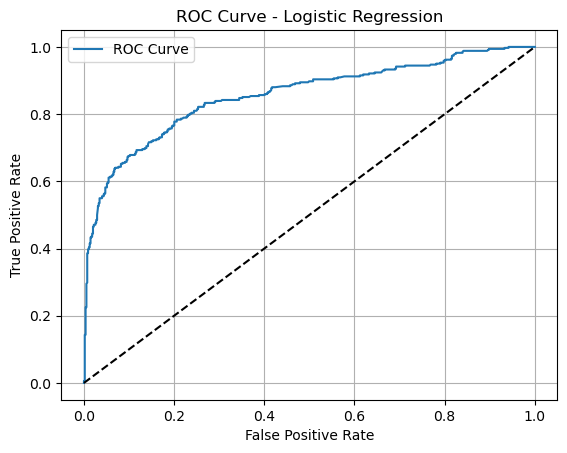


Accuracy: 0.7991021324354658
Precision: 0.7492354740061162
Recall: 0.716374269005848
F1 Score: 0.7324364723467862
ROC AUC Score: 0.8558223883935705


In [12]:
fpr, tpr, _ = roc_curve(y_train, model.predict_proba(X_train_scaled)[:,1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

print("\nAccuracy:", accuracy_score(y_train, train_pred))
print("Precision:", precision_score(y_train, train_pred))
print("Recall:", recall_score(y_train, train_pred))
print("F1 Score:", f1_score(y_train, train_pred))
print("ROC AUC Score:", roc_auc_score(y_train, model.predict_proba(X_train_scaled)[:, 1]))


In [13]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})
print("\nModel Coefficients:")
print(coefficients.sort_values(by='Coefficient', key=abs, ascending=False))



Model Coefficients:
    Feature  Coefficient
1       Sex     1.283189
0    Pclass    -0.920965
2       Age    -0.502633
3     SibSp    -0.354944
6  Embarked     0.153702
5      Fare     0.115347
4     Parch    -0.067864


In [ ]:
'''
Interview Questions:
1. What is the difference between precision and recall?
Precision and Recall are performance metrics for classification models, especially important in imbalanced datasets.

1)Precision = Out of all predicted positives, how many are truly positive?
High precision → Few false positives.
Example: In spam detection, precision means “Of all emails marked as spam, how many are actually spam?”

2)Recall = Out of all actual positives, how many did the model correctly identify?
High recall → Few false negatives.
Example: In cancer detection, recall means “Of all actual cancer patients, how many did we correctly identify?”

'''

In [ ]:
'''
2. What is cross-validation, and why is it important in binary classification?
Cross-Validation is a resampling technique used to evaluate a machine learning model by splitting data into k subsets (folds). 
The model is trained on k-1 folds and tested on the remaining fold. This process is repeated k times, and the results are averaged.

Why it’s important (especially in binary classification):
1)Prevents Overfitting – ensures the model generalizes well, not just memorizes the training set.
2)Efficient Use of Data – all observations are used for both training and testing.
3)Reliable Performance Estimate – gives a better measure of accuracy, precision, recall, or AUC than a single train-test split.
4)Works Well for Imbalanced Classes – metrics like F1-score, ROC-AUC can be averaged across folds to get a fair evaluation.
'''